In [1]:
# State the parameters of the pipeline

disk = '/mnt/pre_epi_seizures/'
baseline_files = 'h5_files/processing_datasets/baseline_datasets_new'
seizure_files = 'h5_files/processing_datasets/seizure_datasets_new'


# Exploratory Data Analysis
from classification.load_for_class import *
import convertpandas as cv_pd
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.kernel_approximation import RBFSampler
from interim_processing import *
import iopes

# Set parameters of analyssis
feature_slot = 'pca_beat_amp_computation'

# Chose hyper-parameters of acquisition (ix of saved files)
hyper_param = 0


patient_list = [3]
lead_list = ['ECG-']
scaler = pp.StandardScaler()
rbf_feature = RBFSampler(gamma=1, random_state=1)
interim_processing = [scaler]
hist_bins = None
dist = None
flag_hist = True
flag_andrews = True
flag_series = True
flag_box = True
flag_pair = True
assign_baseline = 'assign_equal_baseline_seizure'
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 0 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 120 * 60 )]
                                    },
                        }

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Ingest Seizure Data
path_to_load = disk + seizure_files + '.h5'
path_to_map = disk + seizure_files + '_map.txt'

# set Labeling structure
path_to_load = disk + baseline_files + '.h5'
path_to_map = disk + baseline_files + '_map.txt'

# Feature group to analyse -- point of entry
seizure_feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

# Feature group to analyse -- point of entry
baseline_feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

print seizure_feature_name

print baseline_feature_name
# Ingest Baseline Data




seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, seizure_feature_name,
                        lead_list, label_struct)



baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, baseline_feature_name,
                        lead_list, baseline_label_struct)

# Treat Baseline Data
baseline_data = baseline_data.dropna(axis=0, how='any').reset_index(drop=True)

baseline_data = globals()[assign_baseline](baseline_data,
                                          seizure_data,
                                         'seizure_nr',
                                         'patient_nr')

seizure_data = seizure_data.dropna(axis=0, how='any').reset_index(drop=True)

data = pd.concat([seizure_data, baseline_data],
                 ignore_index=True)



[2018-04-12 01:36:55.511917]:get_signal:20:Loading [signal: 3_FA7774DI_ECG-_2017-04-20 03:38:19.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-04-12 01:36:55.512765]:get_signal:20:Loading [signal: 3_FA7774DJ_ECG-_2017-04-20 05:38:32.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_com

/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_
/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_
closed
closed
closed
data
3
0
data
3
0
closed
closed
closed
data
3
0
data
3
0
3
0
changing ix
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [3]:
eda_dir = 'EDAnalysis/'

eda_id = iopes.get_eda_params_path(disk=disk,
                                    eda_dir=eda_dir,
                                    patient_list = patient_list,
                                    lead_list = lead_list,
                                    interim_processing = interim_processing,
                                    hist_bins = hist_bins,
                                    dist = dist,
                                    assign_baseline = assign_baseline,
                                    label_struct = label_struct,
                                    baseline_label_struct = baseline_label_struct,
                                    baseline_feature_name = baseline_feature_name,
                                    seizure_feature_name = seizure_feature_name)
path = disk + eda_dir + eda_id + '/'

('seizure_feature_name', '/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_')('dist', None)('lead_list', ['ECG-'])('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 0)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': 

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['params', 'id']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [4]:
if not os.path.exists(path):
    os.mkdir(path)

In [5]:
# Add Seizure Type
cv_pd.add_seizure_types(data,
                        'patient_nr',
                        'seizure_nr',
                        'types_of_seizure',
                        'location')

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,eig_value_1,eig_value_2,eig_value_3,eig_value_4,eig_value_5,time_sample,patient_nr,seizure_nr,label,color,types_of_seizure,location
0,1.007966,1.781703,9.923815,30.234543,4388.515209,1200893,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
1,0.472974,3.101389,14.830711,29.688658,4538.333594,1201818,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
2,2.290731,6.534241,13.198250,43.918473,4897.358755,1202850,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
3,1.444609,4.286849,13.270585,108.253662,5030.498702,1203869,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
4,1.368923,3.660674,14.342169,154.709443,4821.489181,1204841,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
5,1.622196,3.269956,12.160739,197.978025,5244.439951,1205751,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
6,2.228555,7.629725,14.328991,192.765501,6033.231813,1206729,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
7,2.917194,9.040738,11.396970,188.828333,6193.084949,1207734,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
8,0.826575,5.512233,13.614340,101.384345,6267.937287,1208696,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"
9,1.689828,2.424619,21.948626,55.076304,6613.547967,1209654,3,0,Pre-Ictal data points,yellow,Focal Onset - Secondary Generalized - Aware - ...,"Frontal Left Lobe, Temporal Left Lobe"


In [6]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color', 'types_of_seizure', 'location']
features = [column
            for column in data.columns
            if column not in metafeatures]

# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [7]:
# Modelation
import sklearn.svm as svm
from sklearn.model_selection import *
from sklearn.pipeline import *
import sklearn.naive_bayes as nb
from sklearn.feature_selection import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from keras.utils import np_utils
from classification.keras_neural_nets import *

# Group the data
data_groups = data.groupby(['patient_nr',
                            'seizure_nr',
                            'types_of_seizure',
                            'location'])
group_id = 'seizure_nr'

data_groups_list = list(data_groups)

# prepare data for classification - watch out for memory concerns
X = data[features]
y = data['label']
groups = data[group_id]


# choose Pipeline **Details in pipelines.py 
pipe = Pipeline([('SVC', svm.SVC())])
#pipe = Pipeline([('GaussNB', nb.GaussianNB())])
#pipe = Pipeline([('KNN', KNeighborsClassifier())])
#pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
 #                                               input_dim = len(features),
 #                                               output_dim = len(y.unique()),
#                                                verbose=0))])

# choose parameter search method *coherent with Pipeline steps
param_grid = [
               {'SVC__C': [2**i for i in xrange(-5, 11)],
                'SVC__gamma':[2**i for i in xrange(-15, 1)]},
                 ]
#param_grid = [
               #{'GaussNB__priors': [None]},
                 # ]
#param_grid = [
#               {'KNN__n_neighbors': [n + 1 
 #                                     for n in xrange(0, 16, 2)]},
 #                 ]


# define cross-validation strategy 
cv_out = LeavePGroupsOut(n_groups=1)
cv_in = LeavePGroupsOut(n_groups=1)

# choose scoring
scoring = ['f1_macro', 'accuracy']

# choose wether to perform new computation
compute_all_new = True
plot_eda_all_new = True

search_function = GridSearchCV

hyper_param_heat = False
# Get path to save the results
#full_path = get_full_pipeline_name(path_to_save,
#                                   file_to_save,
#                                   pipe, 
#                                   scoring,
#                                   param_grid,
#                                   feature_names,
#                                   cv_out,
#                                   cv_in,
#                                   trial)



# plot_scatter(path_to_save, data_struct, class_metadata)

# plot_full(file_to_save, data_struct, class_metadata)

# Create directory to save results
#make_dir(full_path)


Using TensorFlow backend.


In [8]:
clf_id = iopes.get_eda_params_path(disk=disk,
                                   eda_dir=eda_dir + '/' + eda_id + '/' ,
                                   scaler=scaler,
                                   pipe = str(pipe),
                                   param_grid = param_grid,
                                   cv_out = cv_out,
                                   cv_in = cv_in,
                                   scoring = scoring,
                                   search_function = search_function,
                                   group_id=group_id)

path_to_save = disk + eda_dir + eda_id + '/' + clf_id

('scoring', ['f1_macro', 'accuracy'])('search_function', <class 'sklearn.model_selection._search.GridSearchCV'>)('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('cv_in', LeavePGroupsOut(n_groups=1))('pipe', "Pipeline(memory=None,\n     steps=[('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n  max_iter=-1, probability=False, random_state=None, shrinking=True,\n  tol=0.001, verbose=False))])")('cv_out', LeavePGroupsOut(n_groups=1))('group_id', 'seizure_nr')('param_grid', [{'SVC__gamma': [3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1], 'SVC__C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]}])


In [9]:
# Interim process the data
for step in interim_processing:
    X = data[features]

    X_norm_np = step.fit_transform(X)

    #X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

    data[features] = X_norm_np

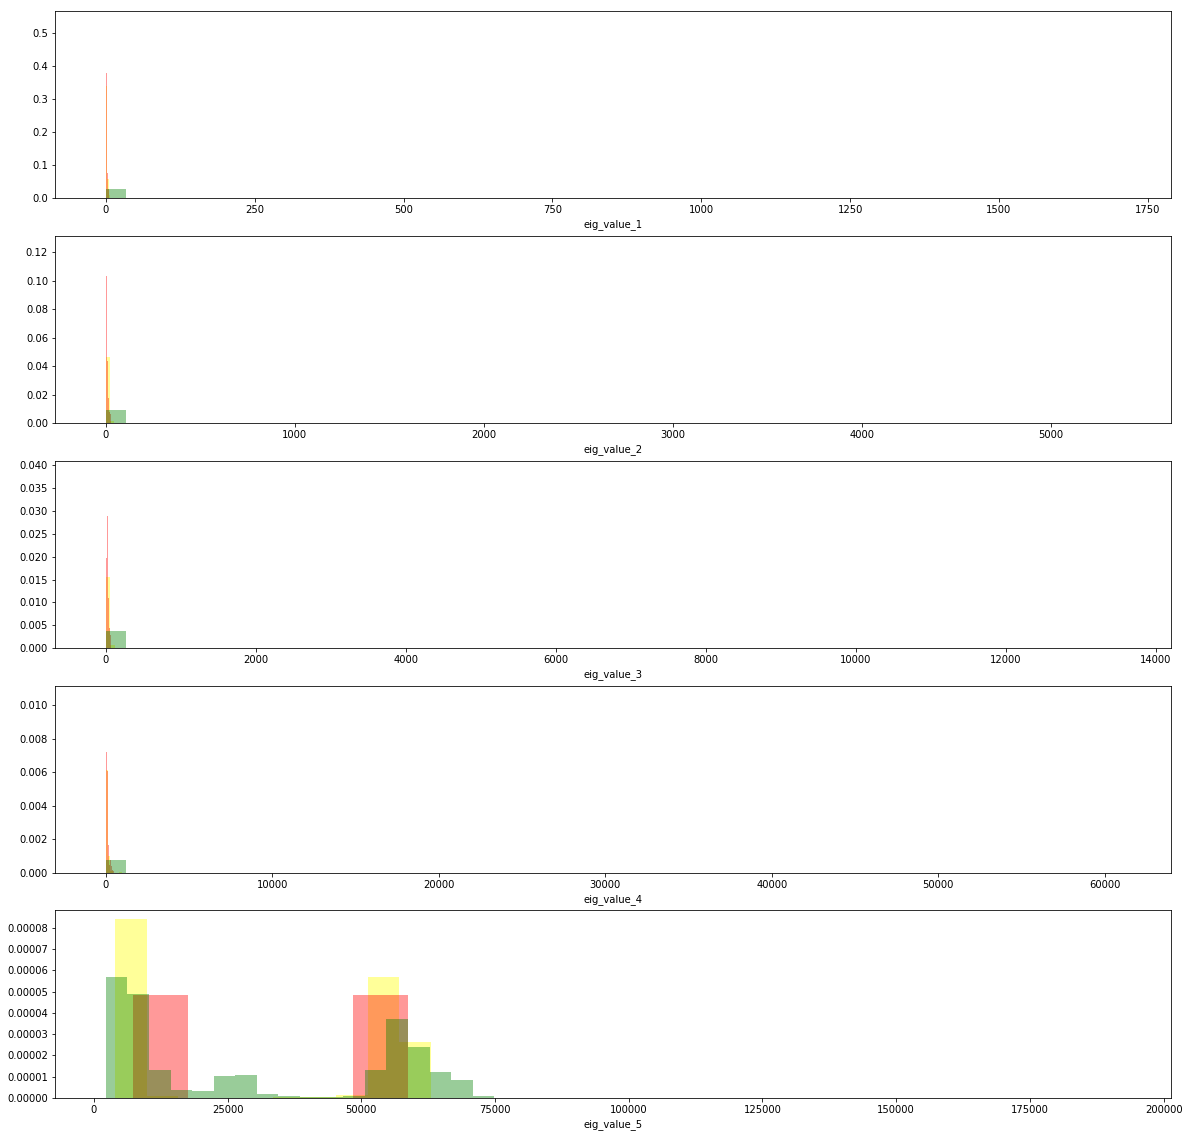

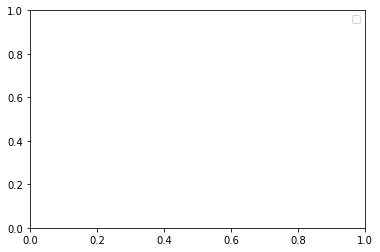

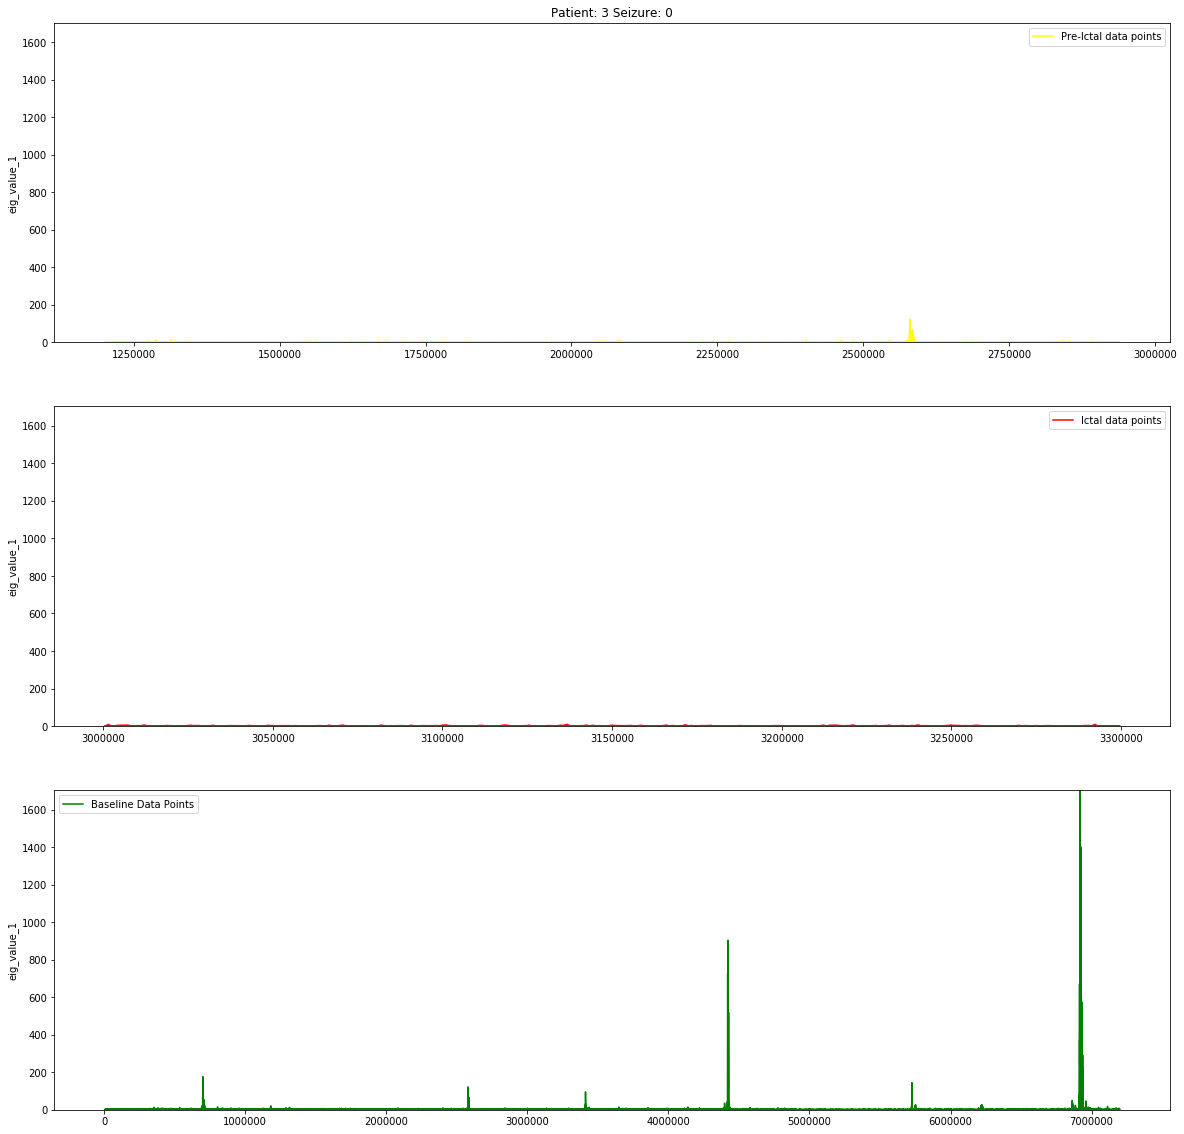

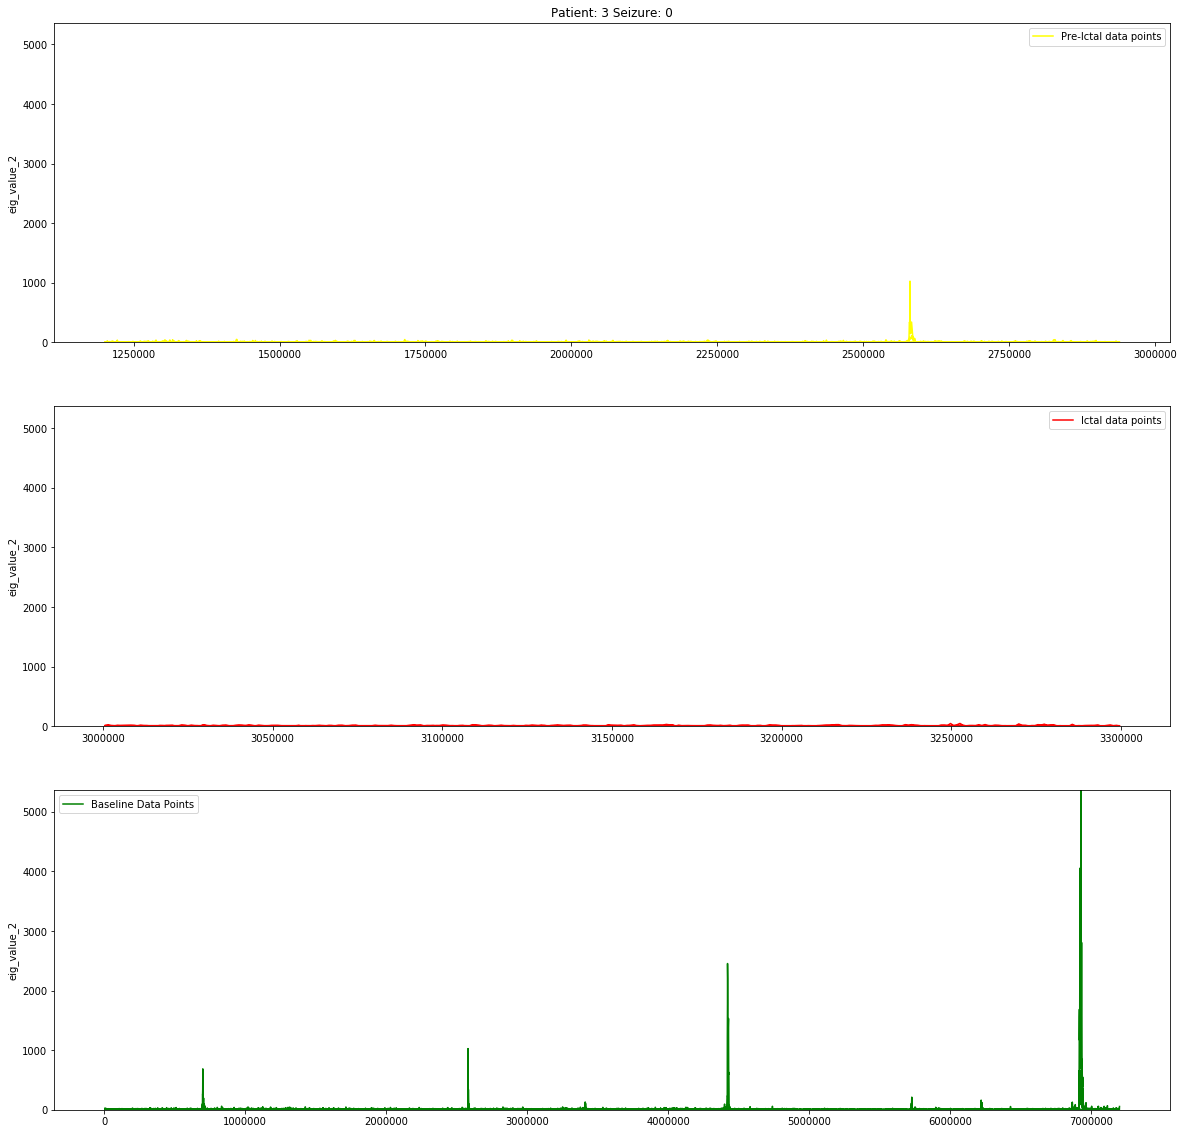

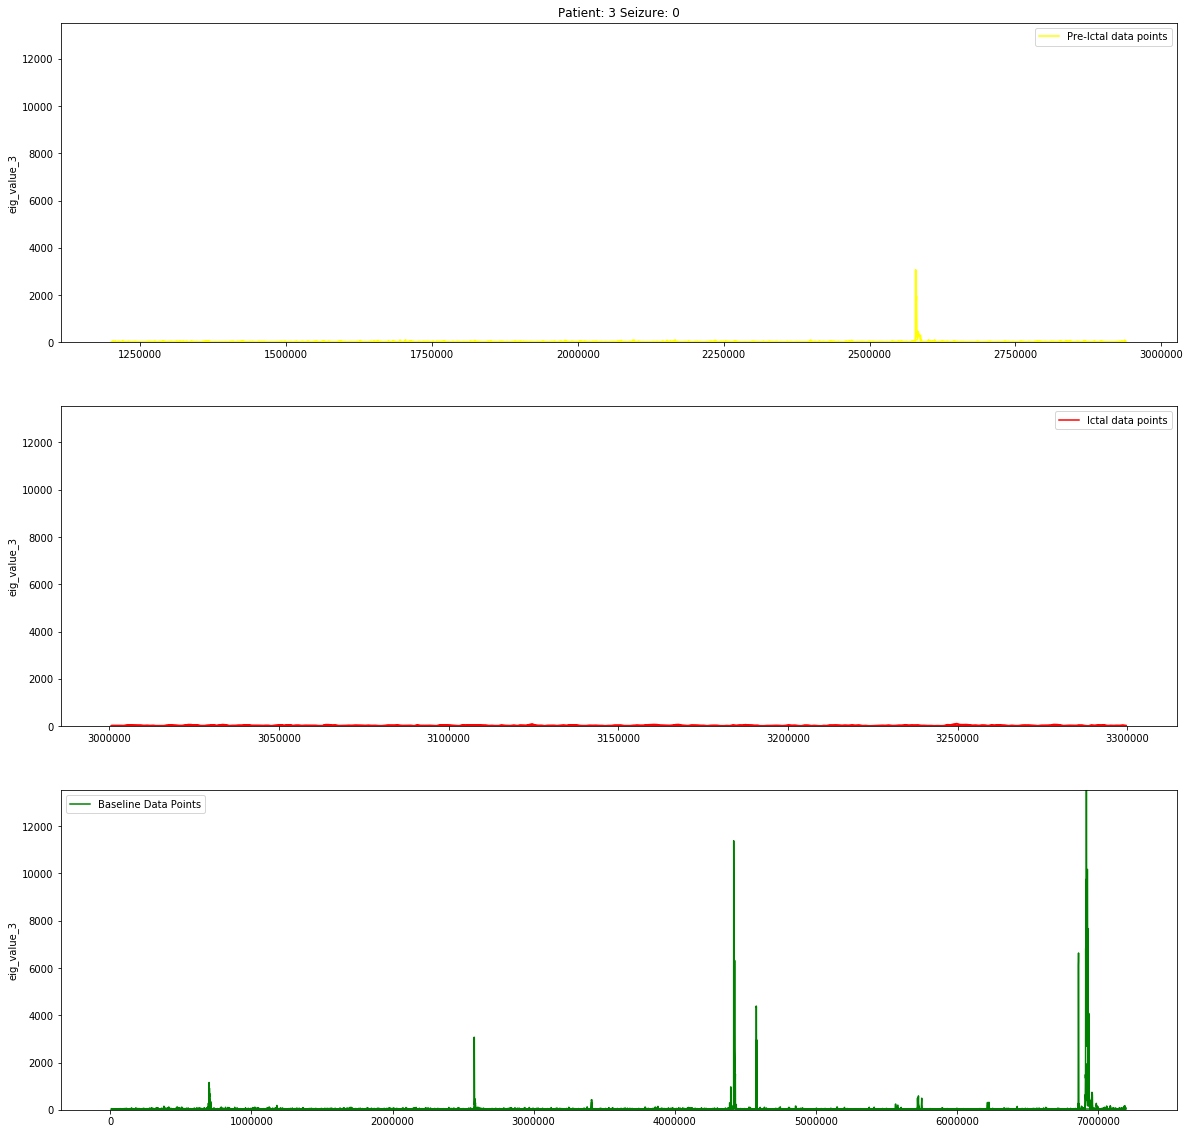

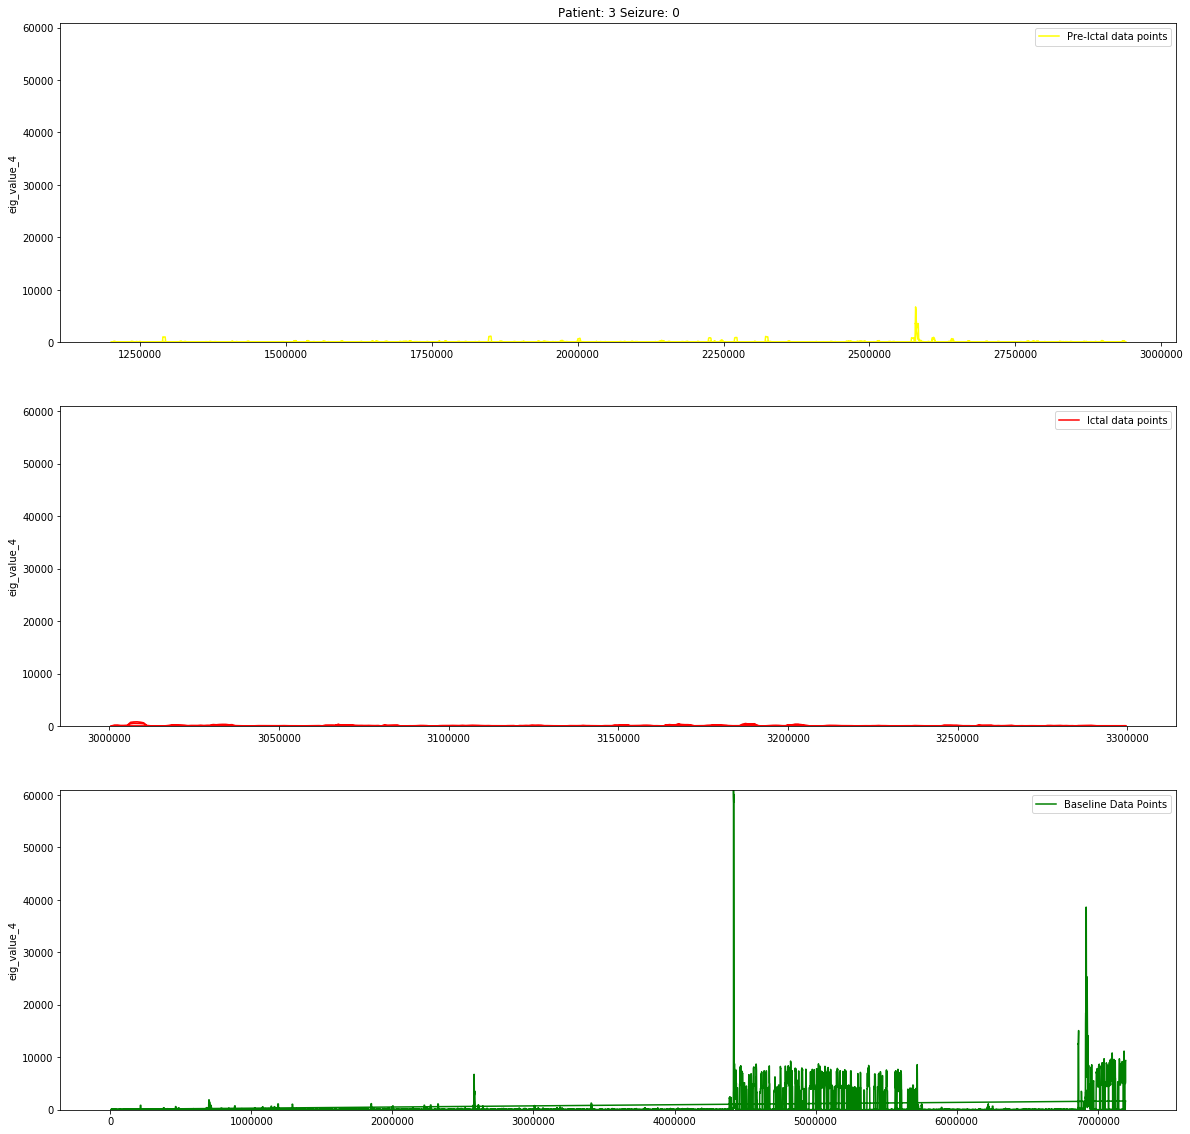

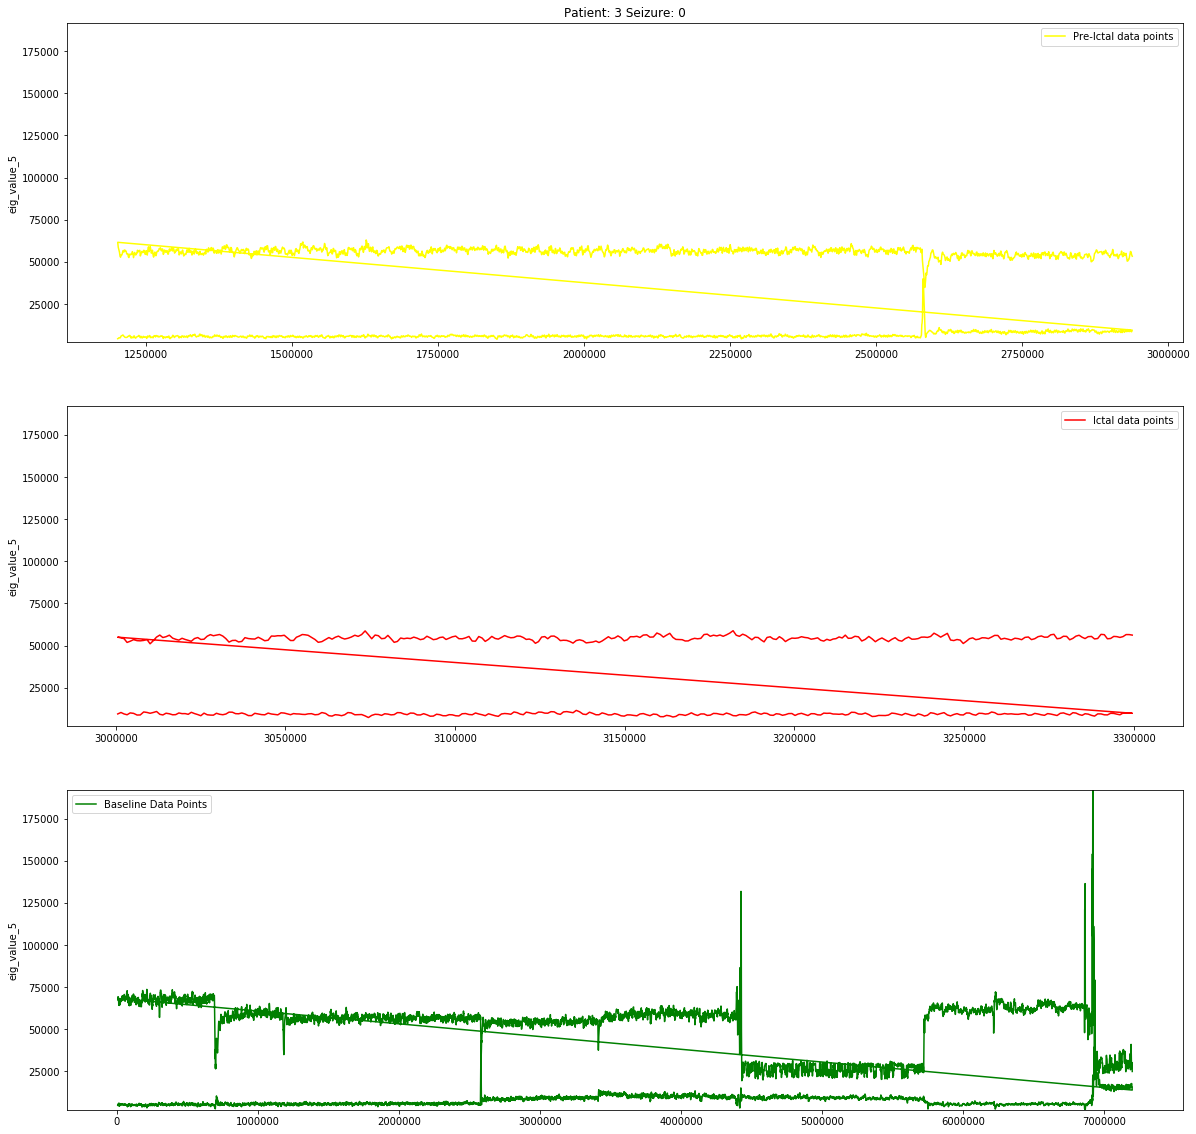

classification/eda/andrews.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


KeyboardInterrupt: 

In [10]:

import classification.eda.hist as plt_hist
import classification.eda.andrews as plt_and
import classification.eda.series as plt_ts
import classification.eda.box as plt_box
import classification.eda.scatter as plt_sc
import matplotlib.pyplot as plt


    
if plot_eda_all_new:

    for data_patient_seizure in data_groups_list:

        if flag_hist:
            plt_hist.histogram(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color',
                                     bins=hist_bins,
                                     dist=dist)


        if flag_series:
            plt_ts.time_series_plot(path_to_save, data_patient_seizure[1],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_andrews:
            plt_and.andrews_curves(path_to_save,
                                    data_patient_seizure[1],
                                    data_patient_seizure[0],
                                    features,
                                    'time_sample',
                                    'patient_nr',
                                    'seizure_nr',
                                    'label',
                                    'color')
        if flag_box:
            plt_box.box_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')

        if flag_pair:

            plt_sc.pair_plot(path_to_save,
                            data_patient_seizure[1],
                            data_patient_seizure[0],
                            features,
                            'time_sample',
                            'patient_nr',
                            'seizure_nr',
                            'label',
                            'color')
            
else:
    import os
    from IPython.display import Image
    a = [name for name in os.listdir(path_to_save) if name.endswith(".png")]
    for image in a:
        display(Image(filename=path_to_save + image))
    
    

In [ ]:
import classification.cross_validation as cv

# ***********************************Learning****************************
# Learn from data_struct using nested cross_validation
# learninig is an optimization and respective test results
# for each partition of the dataset according to cv_out
learning_results = cv.nested_cross_validation(path_to_save,
                                       X,y, groups,
                                       pipe,
                                       param_grid, scoring,
                                       compute_all_new, cv_out, cv_in,
                                       search_function)
#************************************************************************
groups = data_groups.groups.keys()

for learning_result, group in zip(learning_results, groups):
        learning_result['group'] = group
        
cv_object = learning_results

cv.generate_classification_report(cv_object)



In [ ]:
import seaborn as sns
import itertools

if hyper_param_heat:
    for clf, test in learning_results:
        print clf.best_estimator_
        cv_results = clf.cv_results_
        keys = cv_results.keys()

        for grid in param_grid:
            estimator_params = [key 
                                for key in grid.keys()
                                if 'estimator' in key]
            print estimator_params
            param_bi_comb = itertools.combinations(estimator_params, r=2)

            for bi_comb in param_bi_comb:

                for key in keys:

                    if 'param' not in key and 'rank' not in key:
                        metric = cv_results[key]
                        df = metric.reshape(len([2**i for i in xrange(-5, 11)]), len([2**i for i in xrange(-15, 1)]))

                        #df = pd.DataFrame(df, columns=[str(2**i) for i in xrange(-15, 1)])
                        #df['ix'] = [str(2**i) for i in xrange(-5, 11)]
                        #df.set_index('ix')

                        plt.figure()
                        sns.heatmap(df,
                                    xticklabels=[2**i for i in xrange(-5, 11)],
                                    yticklabels=[2**i for i in xrange(-15, 1)],
                                    cbar_kws={'label': key},
                                   )
                        plt.title(key)
                        plt.xlabel(bi_comb[0])
                        plt.ylabel(bi_comb[1])
                        #plt.savefig(path_to_save + '/' + key)
                        plt.show()
                        
hyper_param_list=False                        
if hyper_param_list:
    for learning_result in learning_results:

        cv_results = learning_result['cv_results']
        keys = list(cv_results.keys())
        print keys
        
        for grid in param_grid:
            params = grid.keys()
            print params
            for param in params:
                
                key_param_variation = keys[keys.index('param_' + param)]
                param_variation = cv_results[key_param_variation]
                
                print param_variation
                stop
                
                

        

In [ ]:
from classification.cross_validation import *

In [ ]:
report = generate_classification_report(cv_object)
report.to_hdf(path_to_save + 'classification_resport.h5', '/report' )

pd.read_hdf(path_to_save + 'classification_resport.h5', '/report' )

In [ ]:
string = report.to_latex()
print string.replace('\_', " ")

In [ ]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
s = pd.DataFrame(np.random.randn(8, 4), index=arrays)
s


In [ ]:
print s.to_latex()

In [ ]:
del classification_report

In [ ]:
best_params

In [ ]:
learning_results